1. Problem statement
- This project unsersyanfs hownthe student's performance (test scores) is affected by other variables such as gender, ethinicuty, parental level of education, lunch and test perparation course. 

- Data set has 8 columns and 1000 rows

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [5]:
## import csv as dataframe

df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Data checks to perform:

- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check stastics of dataset
- Check various categories prsent in the different categories column

In [8]:
## checking missing 

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
## check duplicates

df.duplicated().sum()

0

In [10]:
## check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring dataset

In [23]:
for i in df.columns:
    if df[i].dtypes == object:
        print(f"{i} : {df[i].unique()}")
        print('---'*25)

gender : ['female' 'male']
---------------------------------------------------------------------------
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
---------------------------------------------------------------------------
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
---------------------------------------------------------------------------
lunch : ['standard' 'free/reduced']
---------------------------------------------------------------------------
test_preparation_course : ['none' 'completed']
---------------------------------------------------------------------------


In [24]:
## defining numerrical and categorical columns

numerical_cols = [i for i in df.columns if df[i].dtypes != 'O']
categorical_cols = [i for i in df.columns if df[i].dtypes == 'O']

# Printing columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['math_score', 'reading_score', 'writing_score']
Categorical Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
## Adding columns for total score and average:

df['total_score'] = df[numerical_cols].sum(axis=1)
df['average_score'] = df[numerical_cols].mean(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print('Number of students with full marks in Math: ', math_full)
print('Number of students with full marks in Writing: ', writing_full)
print('Number of students with full marks in Reading: ', reading_full)



Number of students with full marks in Math:  7
Number of students with full marks in Writing:  14
Number of students with full marks in Reading:  17


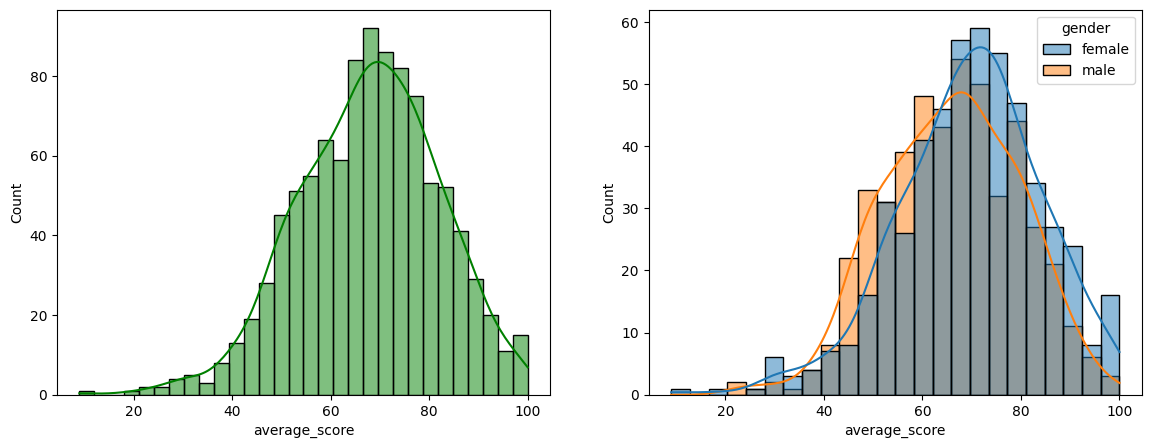

In [30]:
## histogram 

fig, axs = plt.subplots(1,2, figsize = (14,5))
plt.subplot(121)
sns.histplot(data = df, x='average_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data  =df, x='average_score', kde = True, hue = 'gender')
plt.show()

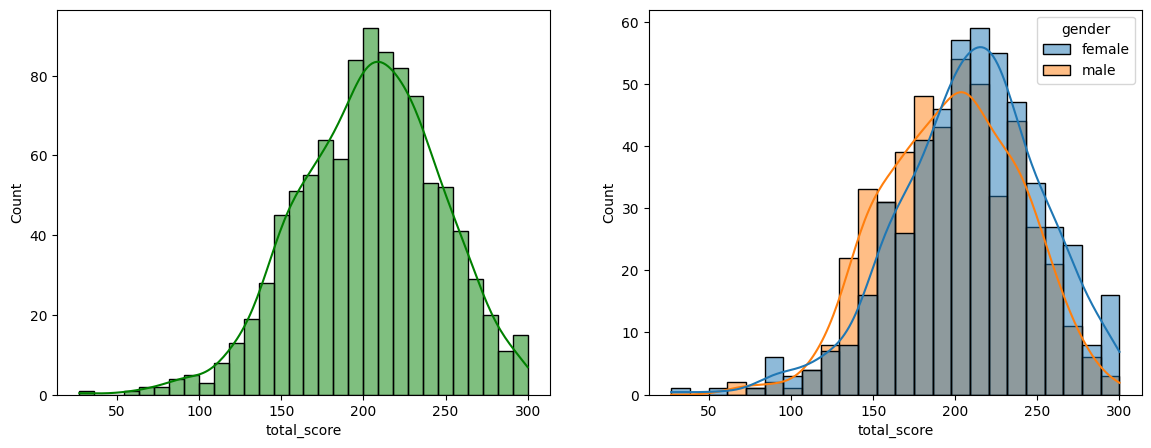

In [31]:
## histogram 

fig, axs = plt.subplots(1,2, figsize = (14,5))
plt.subplot(121)
sns.histplot(data = df, x='total_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data  =df, x='total_score', kde = True, hue = 'gender')
plt.show()

In [ ]:
## need to complete this , lot of things to be done